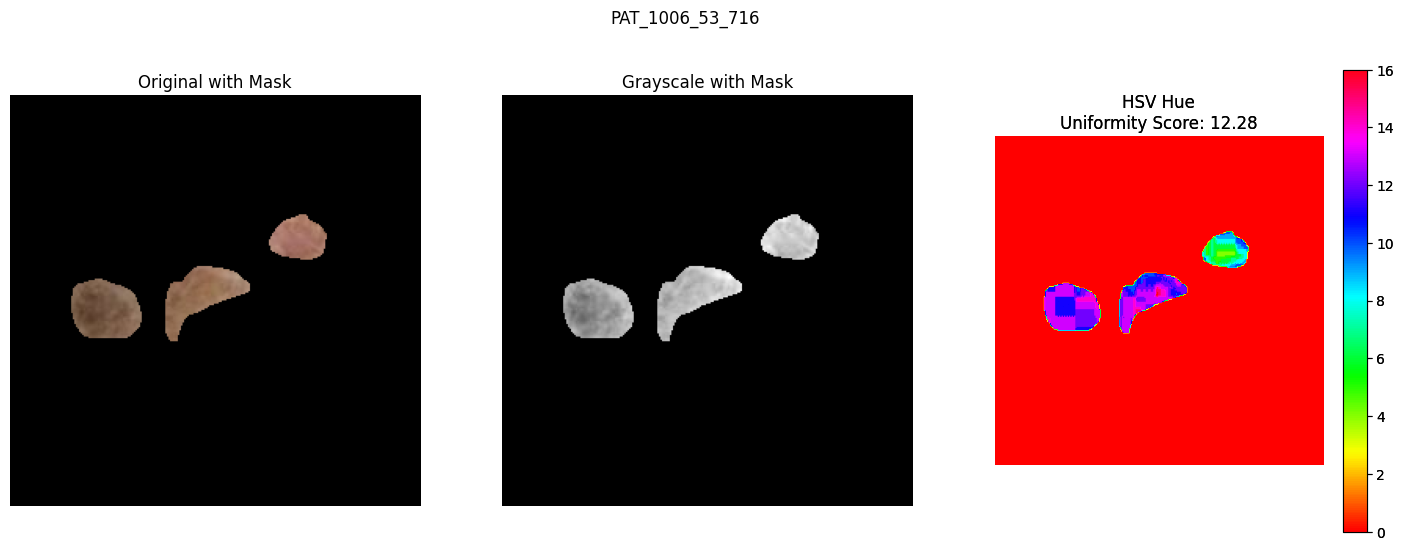

<Figure size 640x480 with 0 Axes>

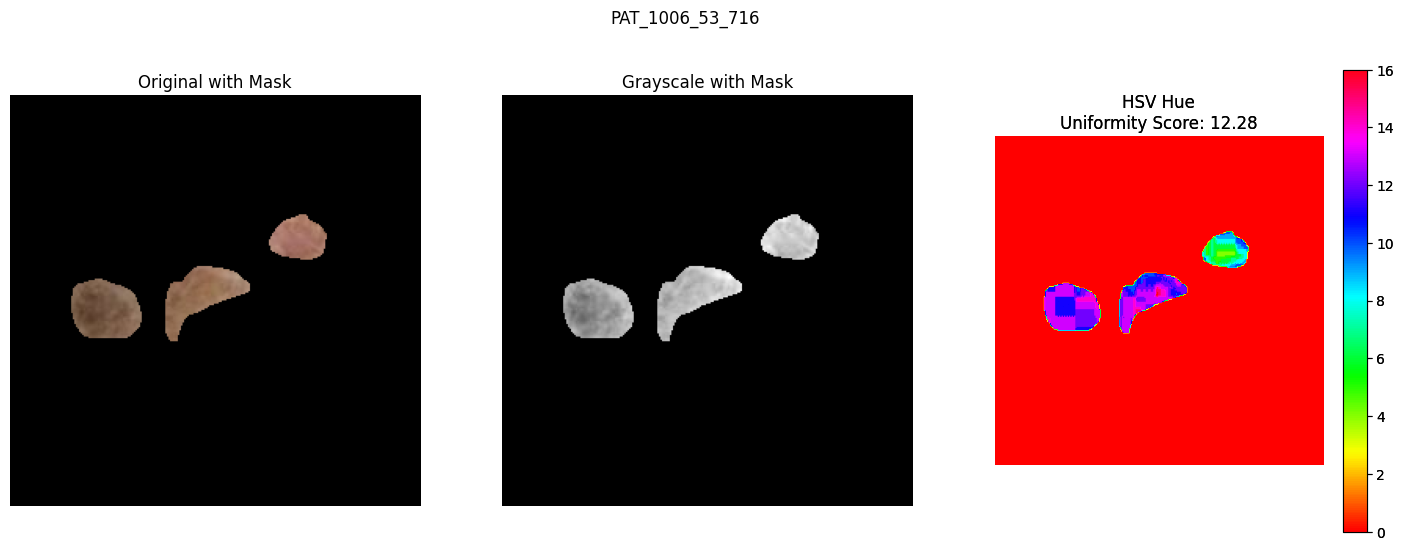

<Figure size 640x480 with 0 Axes>

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def calculate_hsv_uniformity(hsv_image, mask):
    """Calculate the uniformity score based on HSV within the masked area."""
    mask_bool = mask > 0
    std_devs = []
    for i in range(3):  # Iterate over H, S, V channels
        channel = hsv_image[:, :, i]
        masked_channel = channel[mask_bool]  # Apply mask
        std_dev = np.std(masked_channel)
        std_devs.append(std_dev)
    uniformity_score = np.mean(std_devs)
    return uniformity_score

def visualize_results(original_image, mask, hsv_image, title, uniformity_score):
    """Visualize the original image, mask applied, and HSV image for comparison."""
    plt.figure(figsize=(18, 6))
    
    # Original Image with Mask Overlay
    plt.subplot(1, 3, 1)
    masked_original = cv2.bitwise_and(original_image, original_image, mask=mask)
    plt.imshow(cv2.cvtColor(masked_original, cv2.COLOR_BGR2RGB))
    plt.title('Original with Mask')
    plt.axis('off')
    # Original Image with Mask Overlay
    plt.subplot(1, 3, 1)
    masked_original = cv2.bitwise_and(original_image, original_image, mask=mask)
    plt.imshow(cv2.cvtColor(masked_original, cv2.COLOR_BGR2RGB))
    plt.title('Original with Mask')
    plt.axis('off')

    # Grayscale Image with Mask
    plt.subplot(1, 3, 2)
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    masked_grayscale = cv2.bitwise_and(grayscale_image, grayscale_image, mask=mask)
    plt.imshow(masked_grayscale, cmap='gray')
    plt.title('Grayscale with Mask')
    plt.axis('off')
    # Grayscale Image with Mask
    plt.subplot(1, 3, 2)
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    masked_grayscale = cv2.bitwise_and(grayscale_image, grayscale_image, mask=mask)
    plt.imshow(masked_grayscale, cmap='gray')
    plt.title('Grayscale with Mask')
    plt.axis('off')

    # HSV Hue Channel with Mask
    plt.subplot(1, 3, 3)
    hue_channel = hsv_image[:, :, 0]
    masked_hue = hue_channel.copy()
    masked_hue[~(mask > 0)] = 0  # Zero out areas outside the mask
    plt.imshow(masked_hue, cmap='hsv')
    plt.colorbar()
    plt.title(f'HSV Hue\nUniformity Score: {uniformity_score:.2f}')
    plt.axis('off')
    # HSV Hue Channel with Mask
    plt.subplot(1, 3, 3)
    hue_channel = hsv_image[:, :, 0]
    masked_hue = hue_channel.copy()
    masked_hue[~(mask > 0)] = 0  # Zero out areas outside the mask
    plt.imshow(masked_hue, cmap='hsv')
    plt.colorbar()
    plt.title(f'HSV Hue\nUniformity Score: {uniformity_score:.2f}')
    plt.axis('off')
    plt.suptitle(title)
    plt.show()
    plt.suptitle(title)
    plt.show()

def process_images_with_hsv_uniformity(raw_data_dir, mask_dir):
    HSV_score = {'img_id':[],
                 'hsv_score':[]}
    for filename in os.listdir(raw_data_dir):
        if filename.endswith(".png"):
            base_name = filename[:-4]
            image_path = os.path.join(raw_data_dir, filename)
            mask_name = base_name + '_mask.png'
            mask_path = os.path.join(mask_dir, mask_name)
            original_image = cv2.imread(image_path)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            
            if original_image is None or mask is None:
                # HSV_score['img_id'].append(filename)
                # HSV_score['hsv_score'].append('N/A')
                continue
                        
            hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
            uniformity_score = calculate_hsv_uniformity(hsv_image, mask)
            visualize_results(original_image, mask, hsv_image, base_name, uniformity_score)
            # HSV_score['img_id'].append(filename)
            # HSV_score['hsv_score'].append(uniformity_score)
            return visualize_results(original_image, mask, hsv_image, base_name, uniformity_score)


raw_data_dir = '../data/images'
mask_dir = '../data/masks'

process_images_with_hsv_uniformity(raw_data_dir, mask_dir)
# print(process_images_with_hsv_uniformity(raw_data_dir, mask_dir))